In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [36]:
df = pd.read_csv('btc-data-14-24.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,9/22/2014,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [37]:
df.shape

(3412, 7)

In [38]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3.412000e+03
mean,14747.360368,15091.809098,14376.126436,14758.111980,14758.111980,1.663026e+10
std,16293.633702,16683.948249,15855.901350,16295.374063,16295.374063,1.907607e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,921.790009,935.210266,908.876495,921.739258,921.739258,1.685530e+08
50%,8288.819824,8464.720703,8108.011475,8285.438965,8285.438965,1.176004e+10
75%,24345.831545,24986.300290,23907.724608,24382.675295,24382.675295,2.697648e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3412 non-null   object 
 1   Open       3412 non-null   float64
 2   High       3412 non-null   float64
 3   Low        3412 non-null   float64
 4   Close      3412 non-null   float64
 5   Adj Close  3412 non-null   float64
 6   Volume     3412 non-null   float64
dtypes: float64(6), object(1)
memory usage: 186.7+ KB


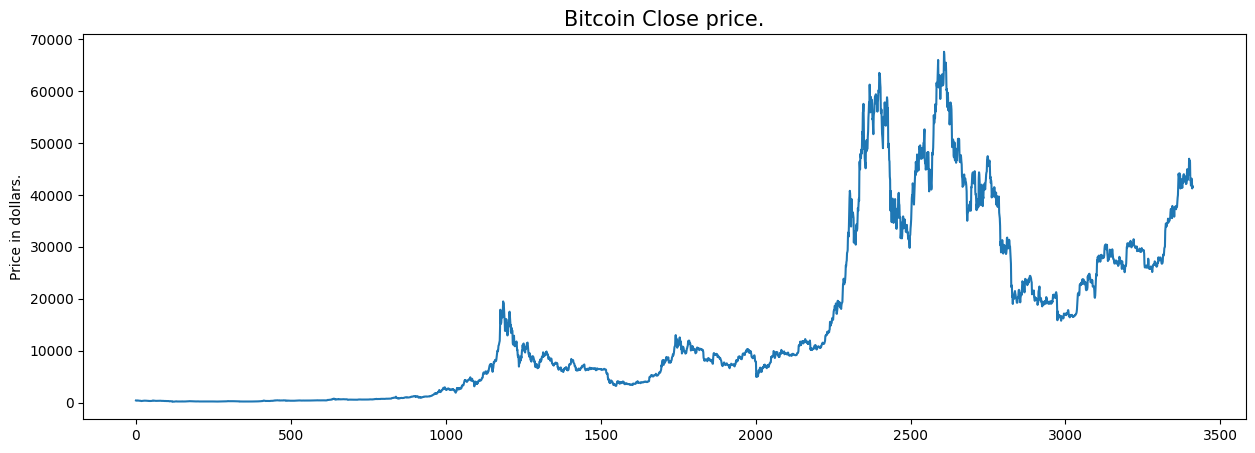

In [40]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [41]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((3412, 7), (3412, 7))

In [42]:
df = df.drop(['Adj Close'], axis=1)

In [43]:
df.head()

,Date,Open,High,Low,Close,Volume
0,9/18/2014,456.859985,456.859985,413.104004,424.440002,34483200.0
1,9/19/2014,424.102997,427.834991,384.532013,394.795990,37919700.0
2,9/20/2014,394.673004,423.295990,389.882996,408.903992,36863600.0
3,9/21/2014,408.084991,412.425995,393.181000,398.821014,26580100.0
4,9/22/2014,399.100006,406.915985,397.130005,402.152008,24127600.0


In [44]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


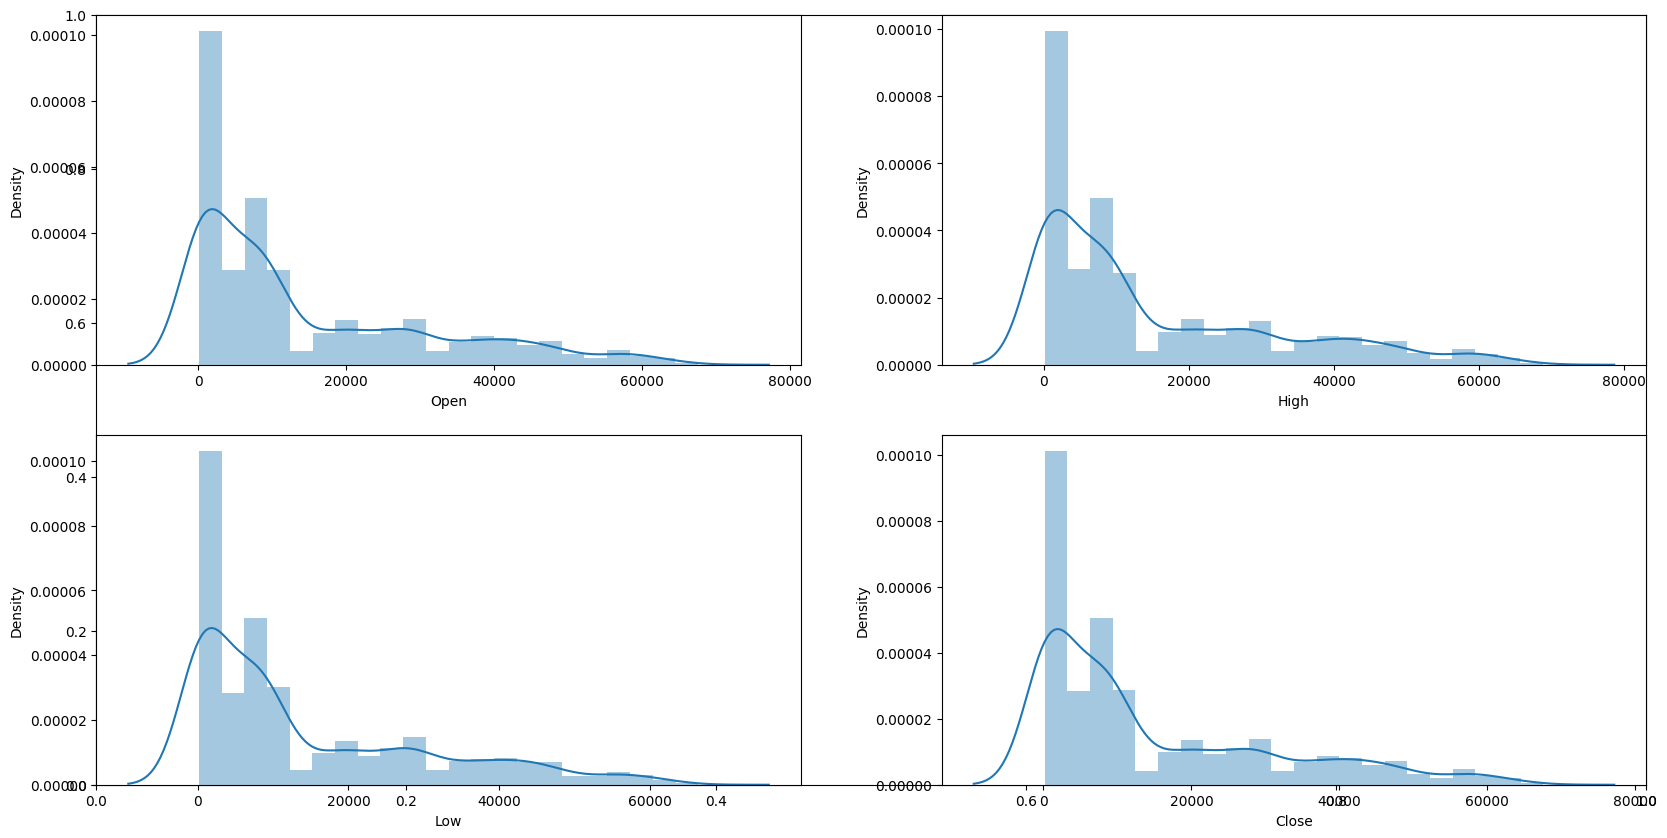

In [45]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

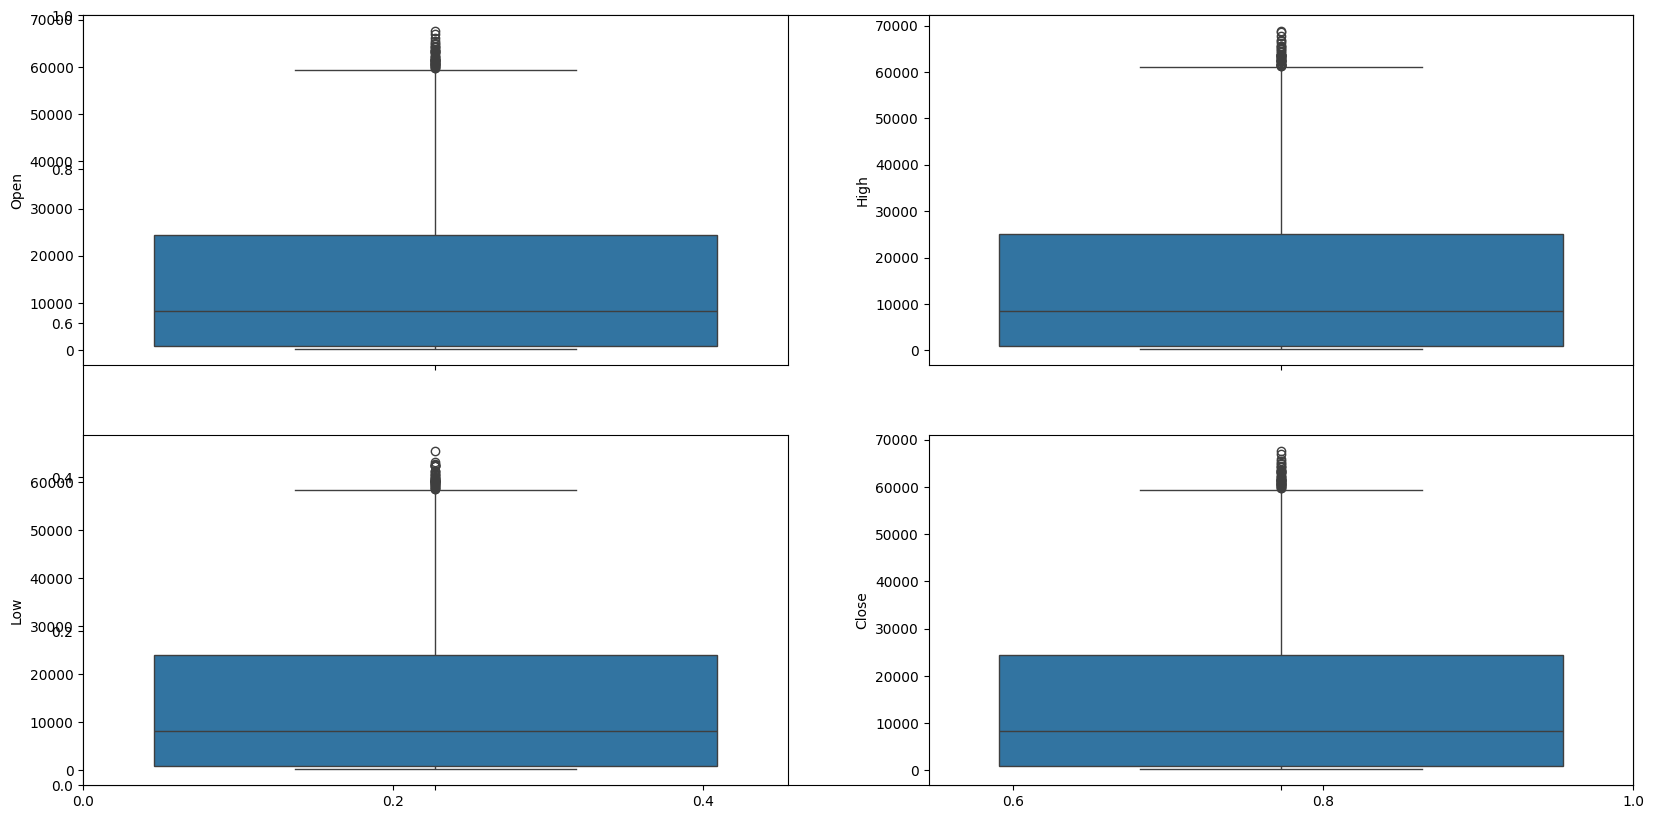

In [46]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [47]:
splitted = df['Date'].str.split('/', expand=True)

df['year'] = splitted[2].astype('int')
df['month'] = splitted[0].astype('int')
df['day'] = splitted[1].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df.head()

# This code is modified by Susobhan Akhuli


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9,18
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9,19
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9,20
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9,21
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600.0,2014,9,22


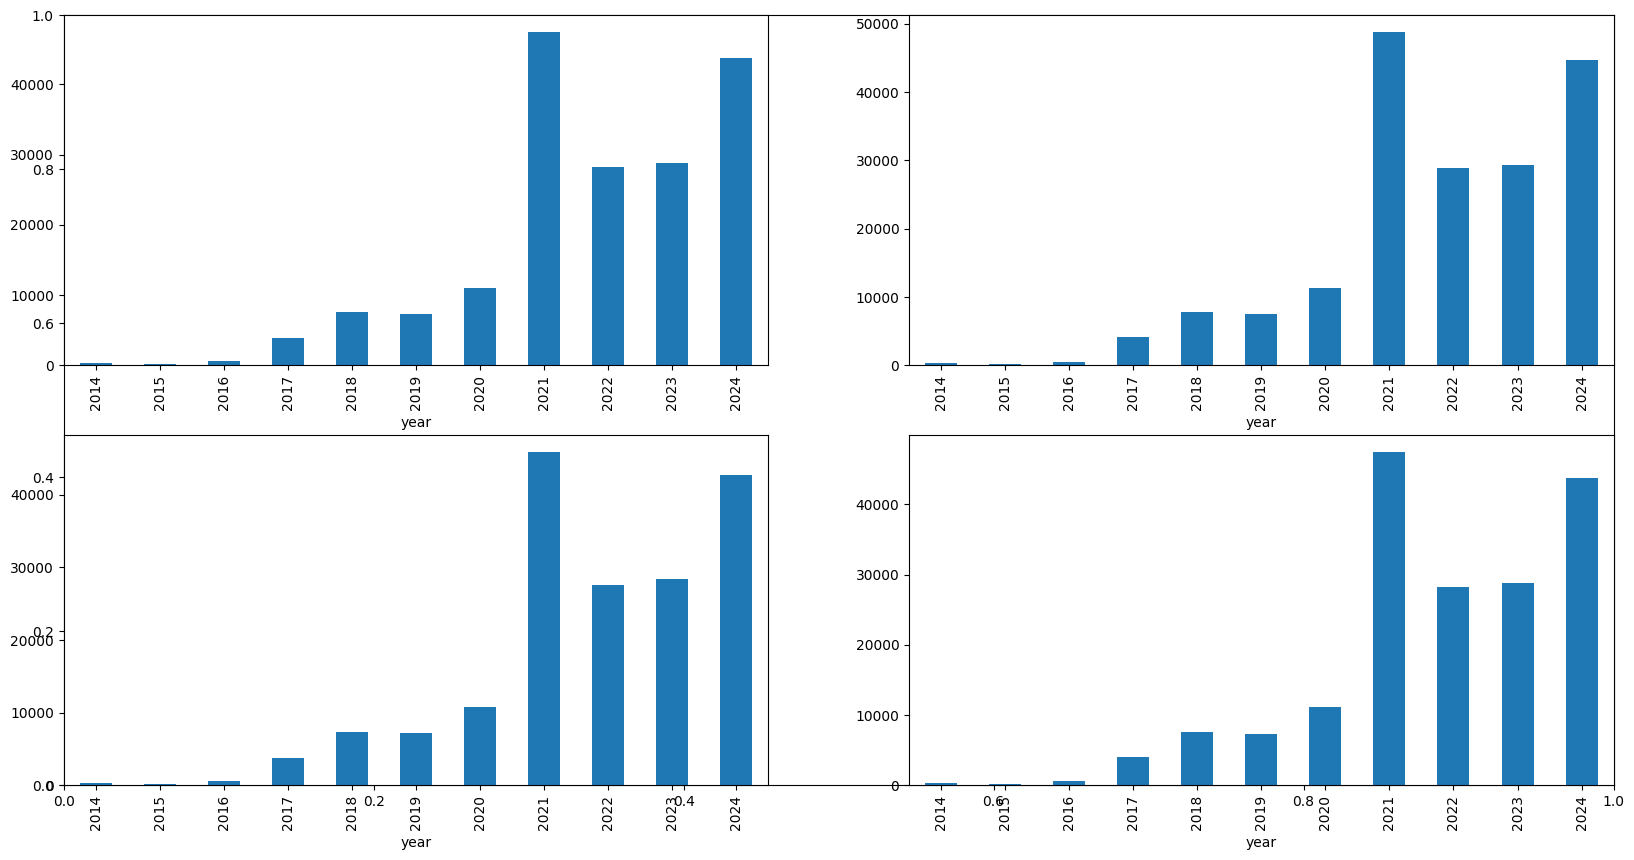

In [48]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [49]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9,18,1
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9,19,1
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9,20,1
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9,21,1
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600.0,2014,9,22,1


In [50]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [51]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9,18,1,32.419983,-43.755981,0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9,19,1,29.307007,-43.302978,1
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9,20,1,-14.230988,-33.412994,0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9,21,1,9.263977,-19.244995,1
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600.0,2014,9,22,1,-3.052002,-9.785980,1


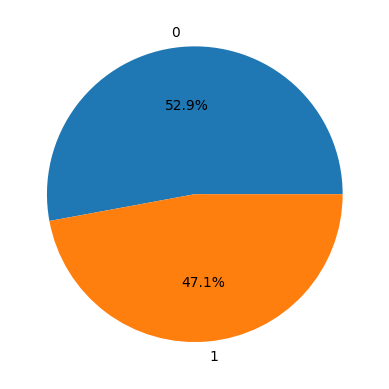

In [52]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

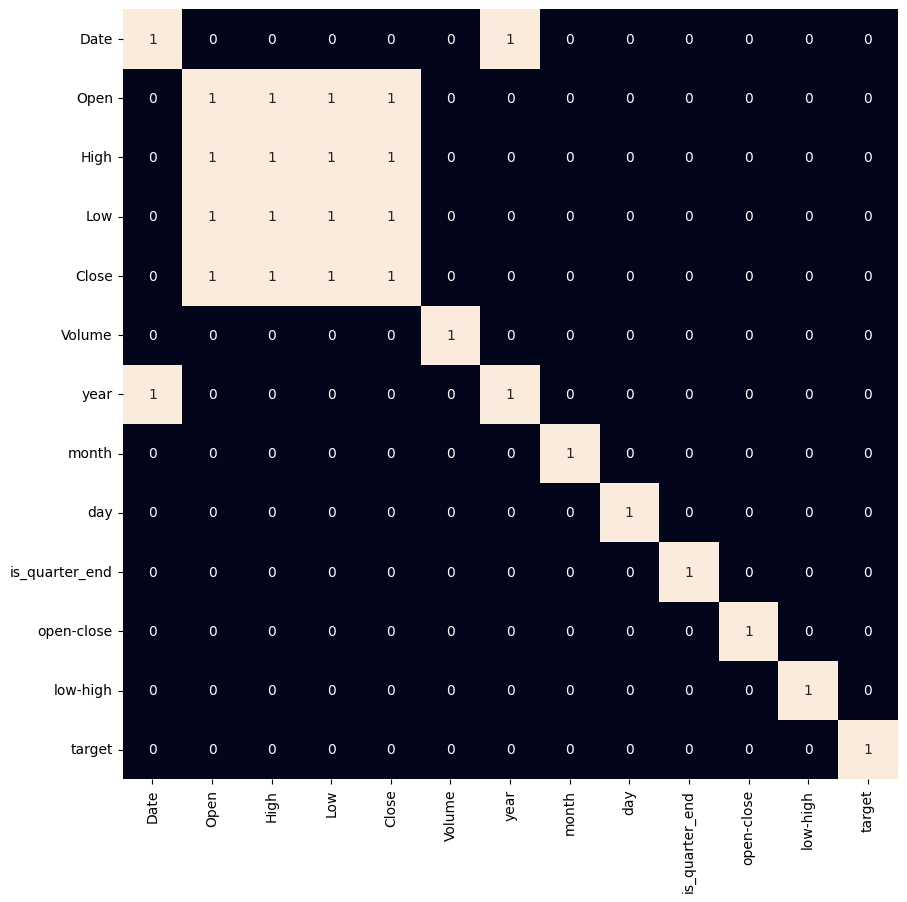

In [53]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [54]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(3070, 3) (342, 3)


In [55]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.533229595122799
Validation Accuracy :  0.5376819037835987

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4667150286082325
Validation Accuracy :  0.4518061975689094

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

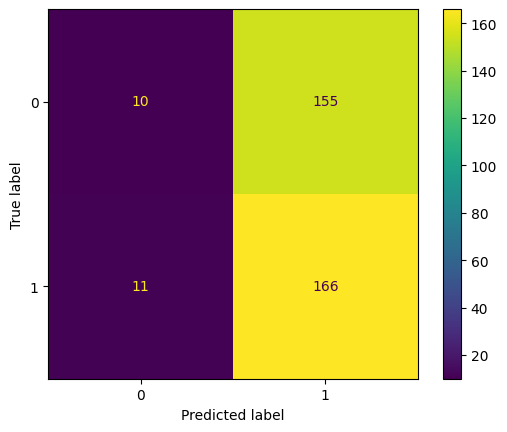

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

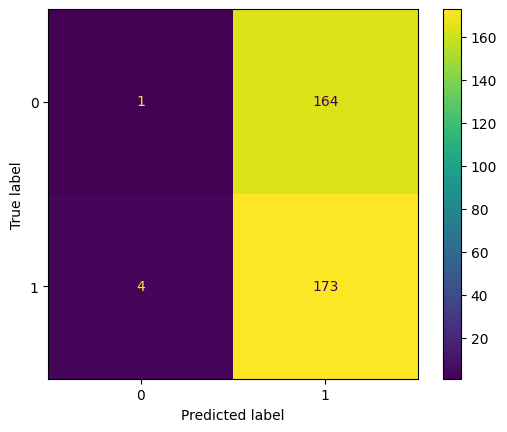

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[1], X_valid, Y_valid)
plt.show()

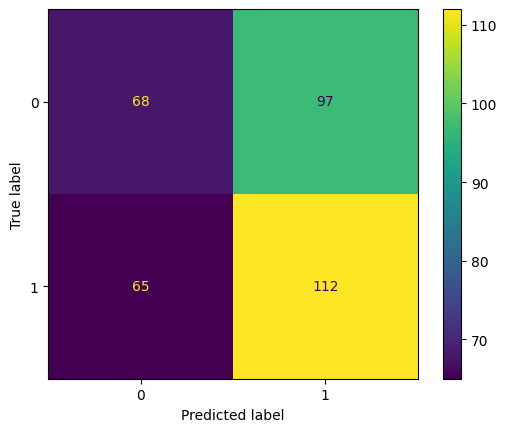

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[2], X_valid, Y_valid)
plt.show()